<center><h1>Machine Learning I</h1></center>
<center><h2>Lab 3: Polynomial regression - answers</h2></center>


## Preliminaries

As we have seen in the lecture, linear regression models and gradient descent based optimization methods are at the core of artificial neural networks. Complementary to Lab 2, logistic regression, in this lab we will study gradient descent in the context of linear regression to master its behaviour and to understand how to implement it from scratch. The lab wants to develop the intuitions on how to approach this problem, so very little information are given, and there is space for a flexible approach. It is strongly advisable to implement the required formulas yourself and to avoid using standard machine learning libraries (e.g. Scikit-learn).

## The problem

You are requested to perform polynomial regression (the formulas are given below) on the data collected from a Combined Cycle Power Plant. The data can be found in Canvas in the "lab3_data.csv" file. It contains five columns. The first column represents the Temperature (the input data - X) on the Celsius scale and the fifth column represents the Net hourly electrical energy output (the output data - Y) in MW. Each row represents a data point. Please note that you don't need columns 2,3, and 4 to solve the assignment.

Regression model: $h_\mathbf{\theta}(\mathbf{x})=\theta_2x^2+\theta_1x+\theta_0\text{, where }\theta_2,\theta_1, \theta_0,\text{ are the model parameters}$

Cost function: $J(\theta)=\frac{1}{2n}\sum_{i=1}^{n}(h_\theta(\mathbf{x}^{(i)})-y^{(i)})^2$ , where $i$ iterates over all data points, $\mathbf{x}^{(i)}$ represents the input of a data point $(i)$, and $\mathbf{y}^{(i)}$ represents the true output of a data point $(i)$.

Optimization method: Gradient descent

Data normalization: Standard score normalization (see https://en.wikipedia.org/wiki/Normalization_(statistics))

## Let's start

First, let us set things up; import the libraries we will need, and load the data to be used later.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt("lab3_data.csv",delimiter=",")
x = data[10:20,0]
y = data[10:20,4]

## Question 1 : 
In the following function implement a polynomial regression model as specified above in "The problem" section. Auxilliary, the function would need to print during training at every 10 iterations, the iteration number, the loss value, the parameter values, and a plot with the obtained regression line at that particular iteration. 

In [5]:
def polynomial_regression(x,y,normalization,alpha,initial_theta,max_iterations):
    # x - input data
    # y - output data
    # normalization - boolean value to normalize the data or not
    # alpha - learning rate
    # initial_theta - initial values of the parameters
    # max_iterations - number of iterations
    
    theta=initial_theta

    bias = np.ones(x.shape[0])#initialize bias 
    
    print ("Input Data")
    print (x)
    print ("Output Data")
    print (y)
    
    if (normalization):
        x = (x-np.mean(x))/(np.std(x))
        y = (y-np.mean(y))/(np.std(y))
        print ("Input Data normalized")
        print (x)
        print ("Output Data normalized")
        print (y)
    

    for i in range(max_iterations):
        ypred=theta[2]*x[:]*x[:]+theta[1]*x[:]+theta[0]*bias[:]
        
        #print (ypred.shape[0])
        
        J=np.sum(((ypred-y)*(ypred-y)))/(2*y.shape[0])

        dtheta2 = (ypred - y) * x * x
        dtheta1 = (ypred - y) * x
        dtheta0 = (ypred - y) * bias
        
        #print (np.sum(dtheta0),np.sum(dtheta1),np.sum(dtheta2))
        
        theta[2] = theta[2] - alpha * (np.sum(dtheta2)/dtheta2.shape[0])
        theta[1] = theta[1] - alpha * (np.sum(dtheta1)/dtheta1.shape[0])
        theta[0] = theta[0] - alpha * (np.sum(dtheta0)/dtheta0.shape[0])

        if (i%10==0):
            print("Iterations number: ",i,"; Loss: ",J,"; Alpha: ", alpha,"; Parameter values: ", theta)

            plt.scatter(x[:],y)
            xax=np.arange(np.min(x),np.max(x),0.01)
            plt.scatter(xax,theta[2]*xax*xax+theta[1]*xax+theta[0])
            plt.xlabel("x")
            plt.ylabel("y")
            plt.show()

## Question 2
Run the code below and check the results of your implementation.

Input Data
[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
Output Data
[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]
Input Data normalized
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
Output Data normalized
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
Iterations number:  0 ; Loss:  1.4853395403223237 ; Alpha:  0.1 ; Parameter values:  [0.655      0.31060723 0.10103706]


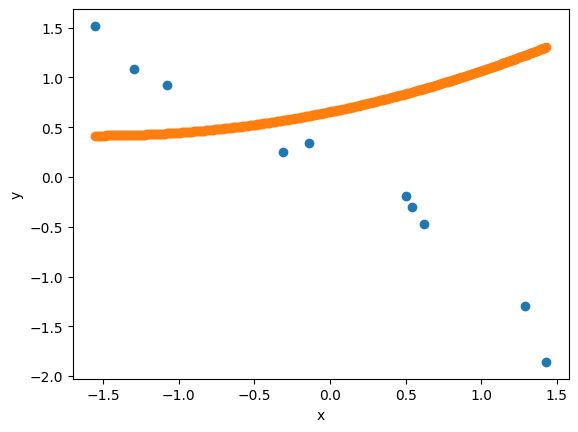

Iterations number:  10 ; Loss:  0.15520460410759365 ; Alpha:  0.1 ; Parameter values:  [ 0.29991262 -0.53910677 -0.18306807]


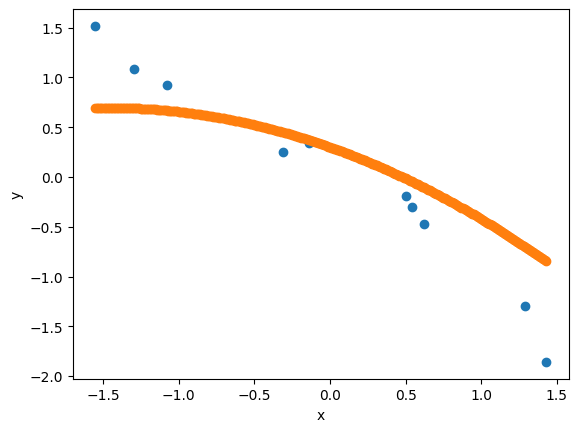

Iterations number:  20 ; Loss:  0.02936158052806284 ; Alpha:  0.1 ; Parameter values:  [ 0.2305359  -0.84417999 -0.19583487]


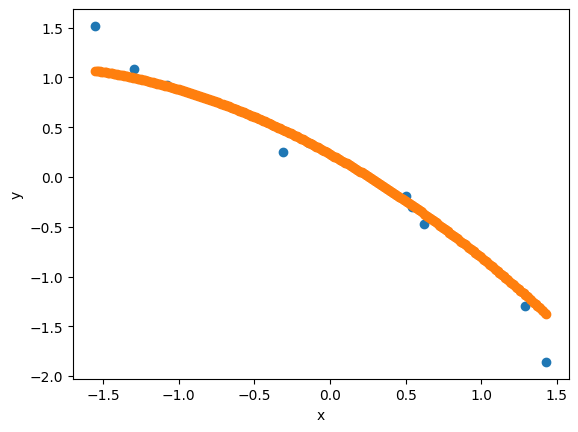

Iterations number:  30 ; Loss:  0.014161415858830555 ; Alpha:  0.1 ; Parameter values:  [ 0.20707047 -0.95066956 -0.19311699]


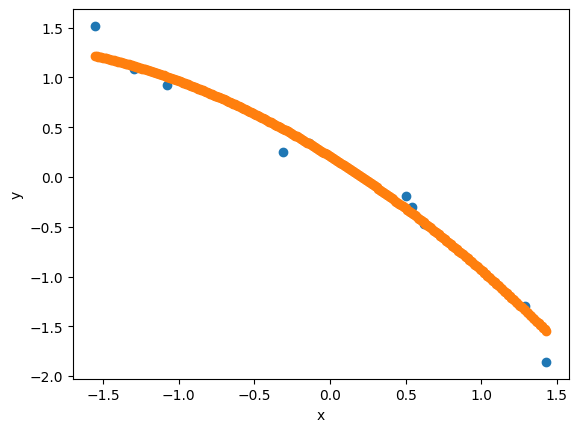

Iterations number:  40 ; Loss:  0.012293728559155614 ; Alpha:  0.1 ; Parameter values:  [ 0.19697289 -0.98749061 -0.19032747]


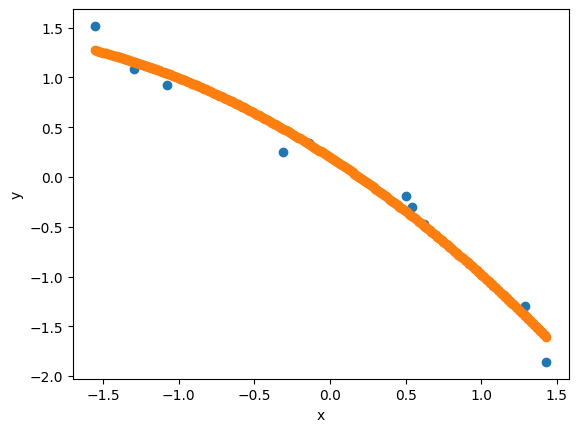

Iterations number:  50 ; Loss:  0.012055324789019493 ; Alpha:  0.1 ; Parameter values:  [ 0.19186635 -1.00007308 -0.18819191]


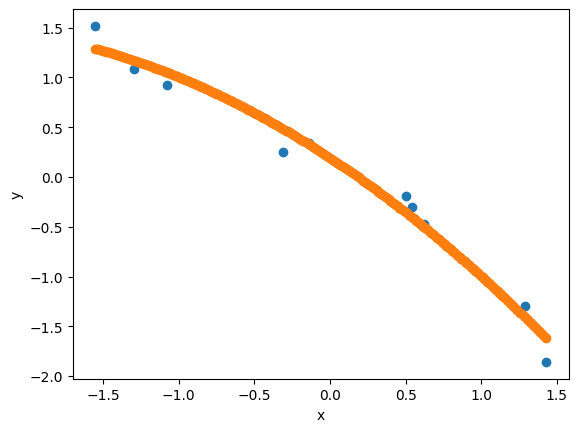

Iterations number:  60 ; Loss:  0.012019979980067241 ; Alpha:  0.1 ; Parameter values:  [ 0.18888886 -1.00426689 -0.18658959]


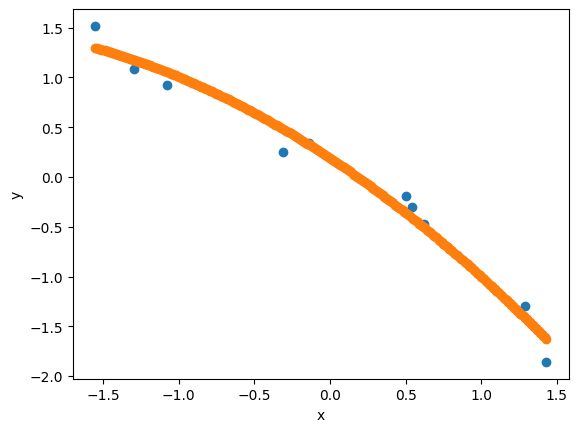

Iterations number:  70 ; Loss:  0.012012114884602442 ; Alpha:  0.1 ; Parameter values:  [ 0.18695362 -1.00558423 -0.18538932]


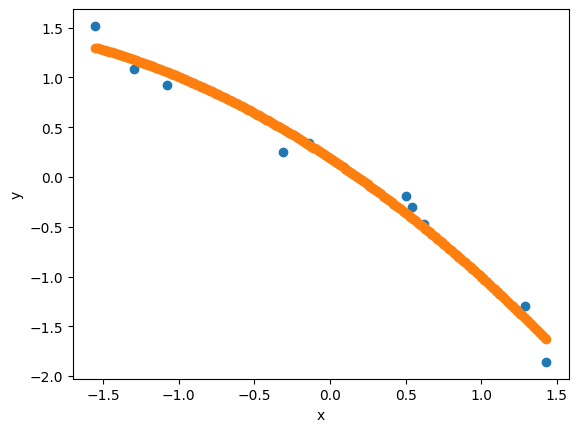

Iterations number:  80 ; Loss:  0.012009157163421918 ; Alpha:  0.1 ; Parameter values:  [ 0.18560695 -1.00593498 -0.18449034]


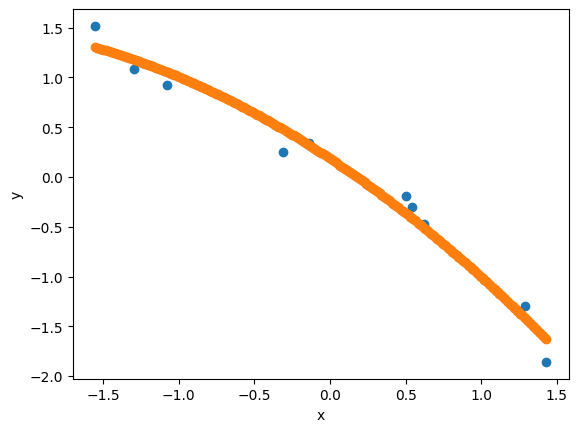

Iterations number:  90 ; Loss:  0.012007674802230818 ; Alpha:  0.1 ; Parameter values:  [ 0.18463415 -1.00597596 -0.18381702]


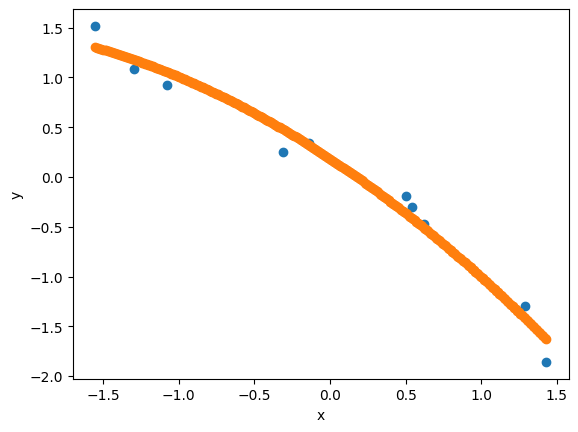

In [10]:
alpha=0.1 #learning rate
normalization=True #boolean value to normalize the data or not
initial_theta=np.asarray([0.75,0.45,0.2]) #initial values of the parameters
max_iterations=100 #number of iterations

polynomial_regression(x,y,normalization,alpha,initial_theta,max_iterations) #the function which has to be implemented by you 






## Question 3:##
After your polynomial regression implementation works fine, run the following code which does not perform normalization of the input data. Just study the learning behaviour in this case and in the case where the data is normalized.





Input Data
[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
Output Data
[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]
Iterations number:  0 ; Loss:  68675.21092529489 ; Alpha:  0.1 ; Parameter values:  [   37.0943344    645.42954416 13219.14508083]


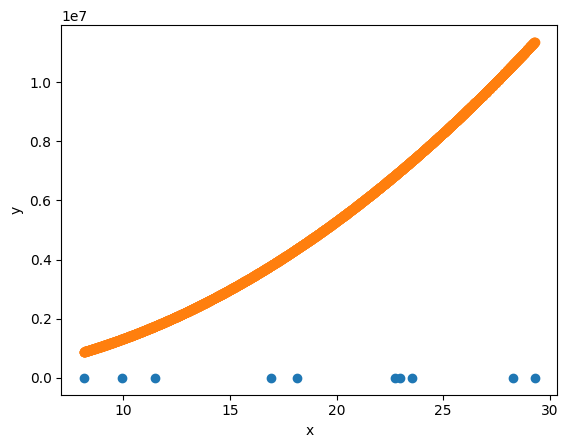

Iterations number:  10 ; Loss:  2.259206293646641e+92 ; Alpha:  0.1 ; Parameter values:  [1.79045969e+45 4.23107384e+46 1.05238592e+48]


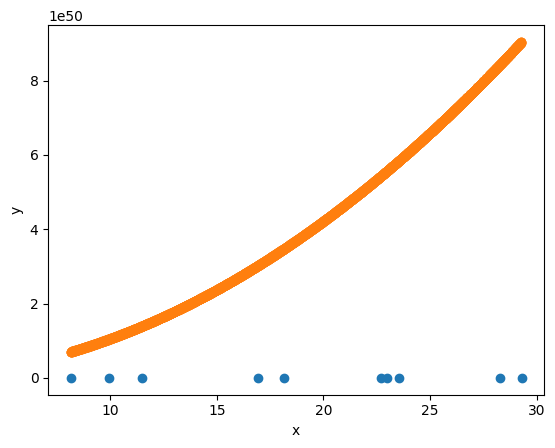

Iterations number:  20 ; Loss:  1.4310237210895983e+180 ; Alpha:  0.1 ; Parameter values:  [1.42498411e+89 3.36741061e+90 8.37568818e+91]


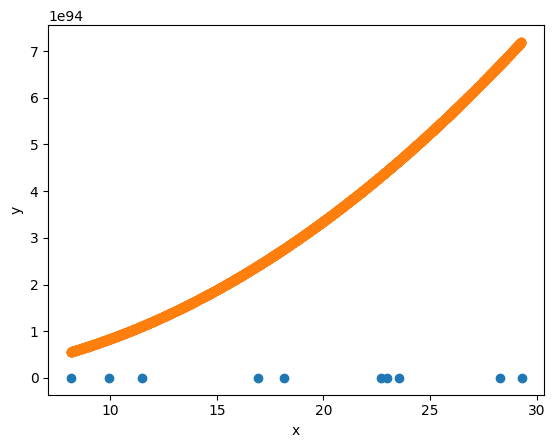

Iterations number:  30 ; Loss:  9.064373165390177e+267 ; Alpha:  0.1 ; Parameter values:  [1.13411082e+133 2.68004168e+134 6.66601018e+135]


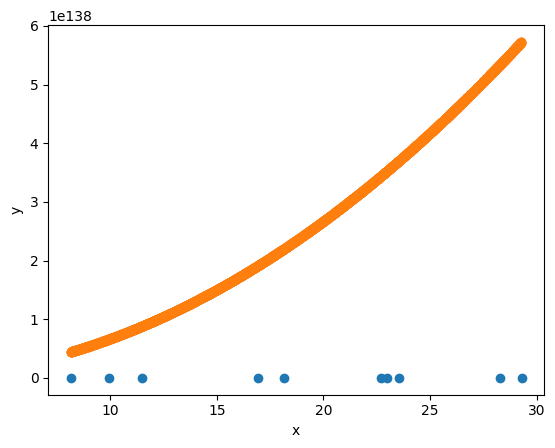

Iterations number:  40 ; Loss:  inf ; Alpha:  0.1 ; Parameter values:  [9.02611711e+176 2.13298116e+178 5.30531829e+179]


C:\Users\david\AppData\Local\Temp\ipykernel_12136\1395945046.py:32: RuntimeWarning: overflow encountered in multiply
  J=np.sum(((ypred-y)*(ypred-y)))/(2*y.shape[0])


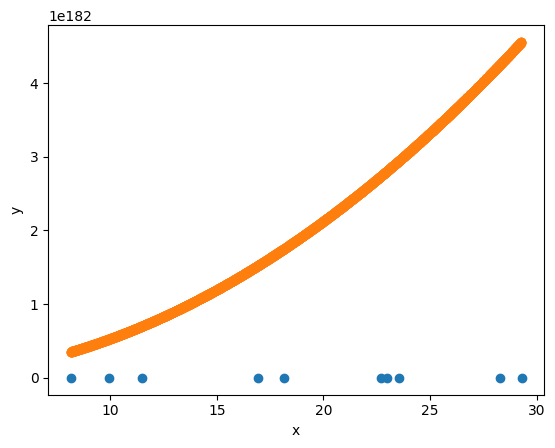

Iterations number:  50 ; Loss:  inf ; Alpha:  0.1 ; Parameter values:  [7.18367102e+220 1.69758876e+222 4.22237611e+223]


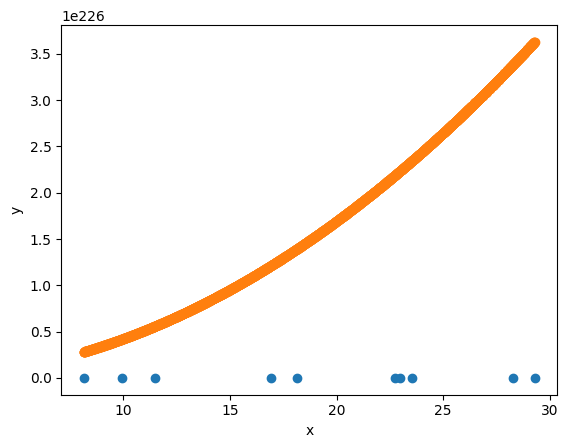

Iterations number:  60 ; Loss:  inf ; Alpha:  0.1 ; Parameter values:  [5.71731219e+264 1.35107035e+266 3.36048830e+267]


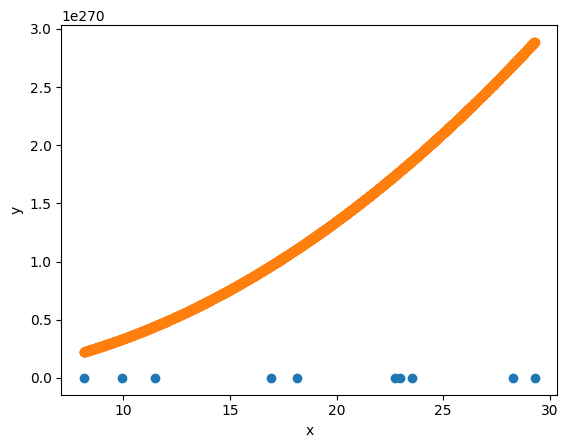

Iterations number:  70 ; Loss:  inf ; Alpha:  0.1 ; Parameter values:  [inf inf nan]


C:\Users\david\AppData\Local\Temp\ipykernel_12136\1395945046.py:34: RuntimeWarning: overflow encountered in multiply
  dtheta2 = (ypred - y) * x * x
C:\Users\david\Documents\GitHub\ML1 Course Labs\pythonProject1\.venv\lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\david\AppData\Local\Temp\ipykernel_12136\1395945046.py:40: RuntimeWarning: invalid value encountered in scalar subtract
  theta[2] = theta[2] - alpha * (np.sum(dtheta2)/dtheta2.shape[0])


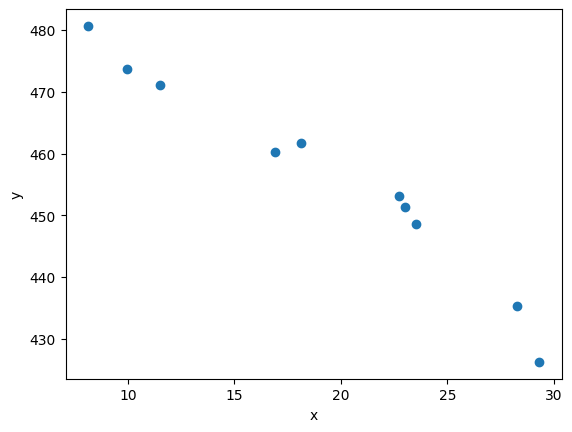

Iterations number:  80 ; Loss:  nan ; Alpha:  0.1 ; Parameter values:  [nan nan nan]


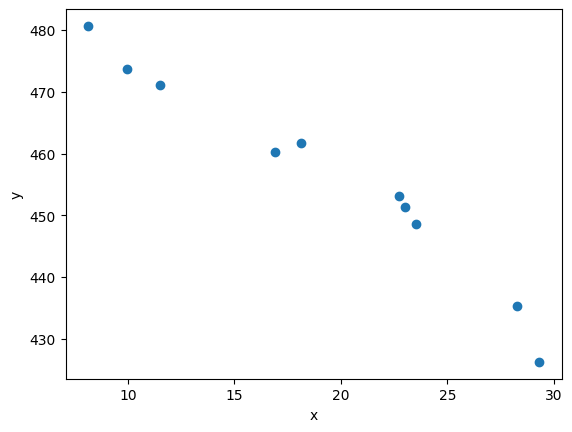

Iterations number:  90 ; Loss:  nan ; Alpha:  0.1 ; Parameter values:  [nan nan nan]


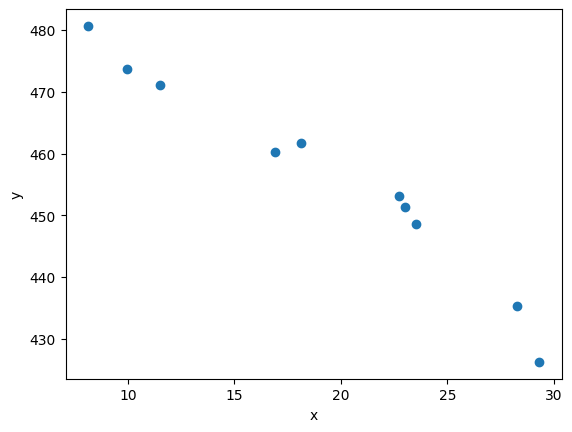

In [7]:
alpha=0.1
normalization=False 
initial_theta=np.asarray([0.75,0.45,0.2])
max_iterations=100

polynomial_regression(x,y,normalization,alpha,initial_theta,max_iterations)

## Question 4: ##
After your polynomial regression implementation works fine, run the following code which studies different learning rate values. Just looked over the results and study the differences.

Input Data
[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
Output Data
[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]
Input Data normalized
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
Output Data normalized
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
Iterations number:  0 ; Loss:  1.4853395403223237 ; Alpha:  1 ; Parameter values:  [-0.2        -0.94392773 -0.78962942]


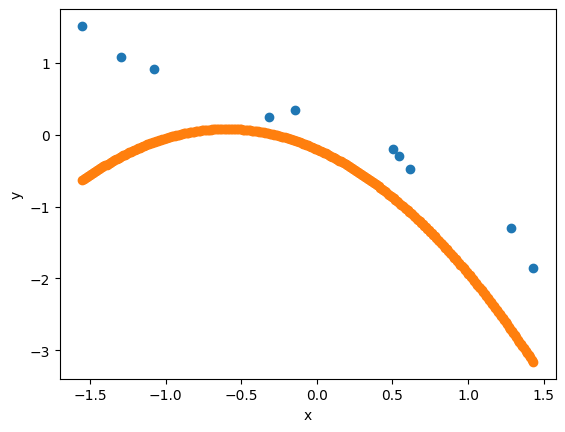

Iterations number:  10 ; Loss:  419.4835105476021 ; Alpha:  1 ; Parameter values:  [-14.98131988   1.44463532 -21.94220386]


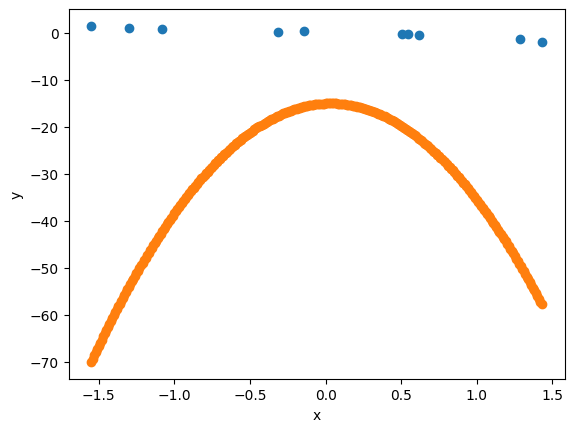

Iterations number:  20 ; Loss:  574679.456186461 ; Alpha:  1 ; Parameter values:  [-561.09654318   89.69322563 -805.58712279]


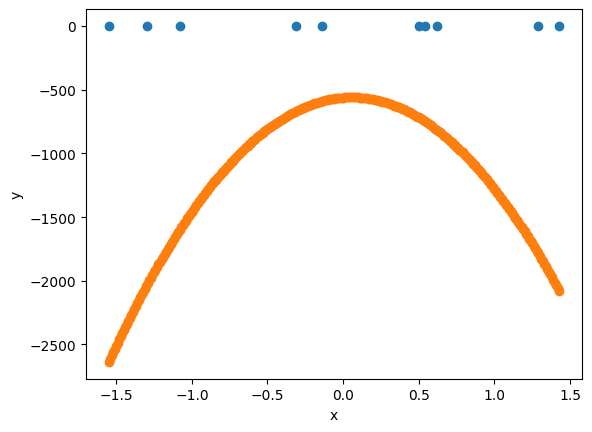

Iterations number:  30 ; Loss:  787315610.6674751 ; Alpha:  1 ; Parameter values:  [-20774.76486796   3356.08767595 -29811.14976648]


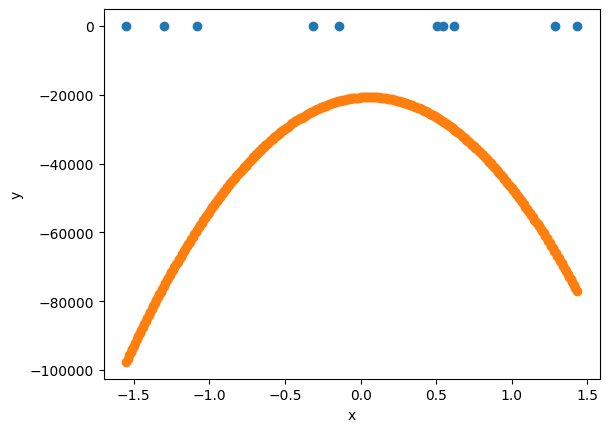

Iterations number:  40 ; Loss:  1078628924453.0156 ; Alpha:  1 ; Parameter values:  [ -768955.86694927   124257.18095643 -1103412.11765687]


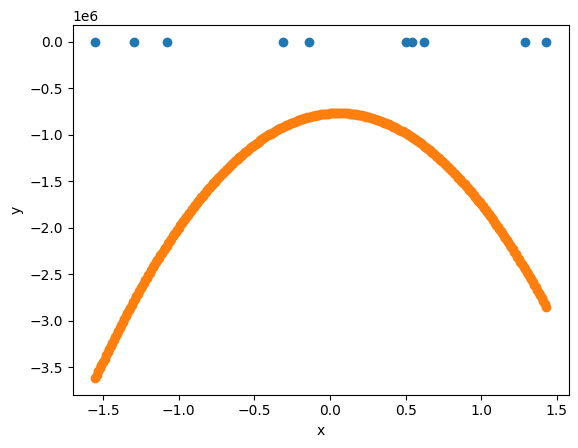

Iterations number:  50 ; Loss:  1477730583416267.8 ; Alpha:  1 ; Parameter values:  [-28461849.28078371   4599244.69469962 -40841273.83340934]


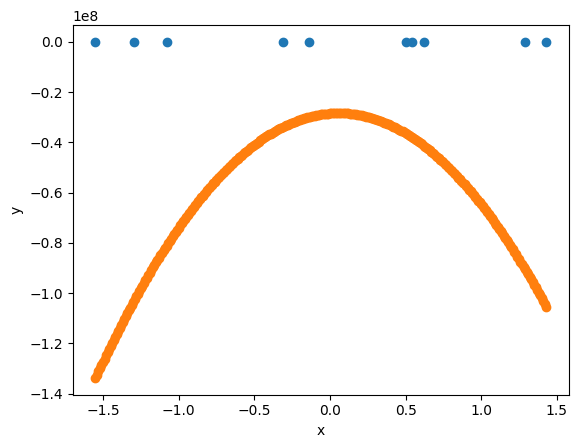

Iterations number:  60 ; Loss:  2.024503170329113e+18 ; Alpha:  1 ; Parameter values:  [-1.05347617e+09  1.70234746e+08 -1.51168352e+09]


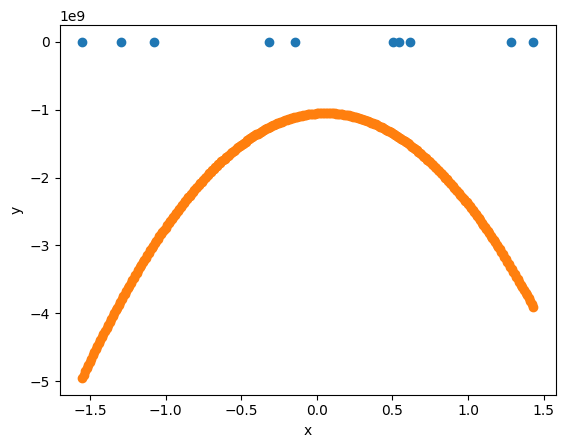

Iterations number:  70 ; Loss:  2.773586154789667e+21 ; Alpha:  1 ; Parameter values:  [-3.89929701e+10  6.30100480e+09 -5.59528840e+10]


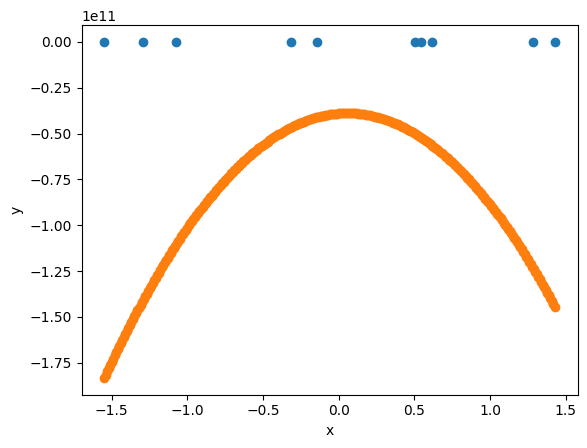

Iterations number:  80 ; Loss:  3.79983606387259e+24 ; Alpha:  1 ; Parameter values:  [-1.44327110e+12  2.33223018e+11 -2.07101897e+12]


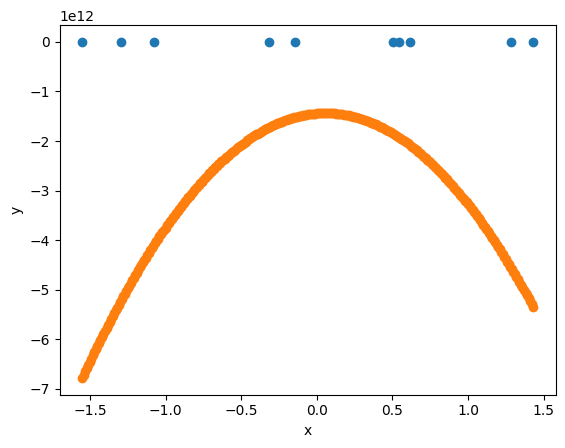

Iterations number:  90 ; Loss:  5.205806961277418e+27 ; Alpha:  1 ; Parameter values:  [-5.34206928e+13  8.63242890e+12 -7.66559158e+13]


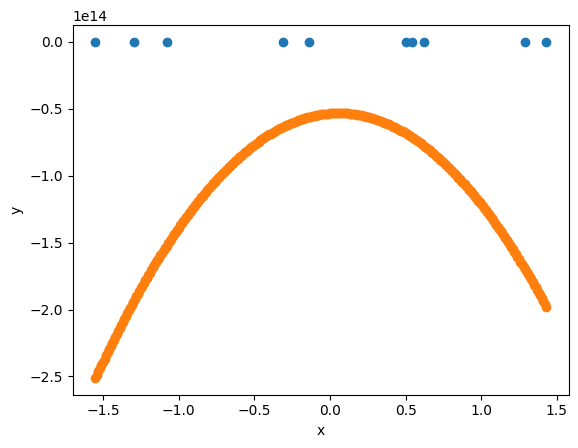

Input Data
[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
Output Data
[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]
Input Data normalized
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
Output Data normalized
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
Iterations number:  0 ; Loss:  1.4853395403223237 ; Alpha:  0.1 ; Parameter values:  [0.655      0.31060723 0.10103706]


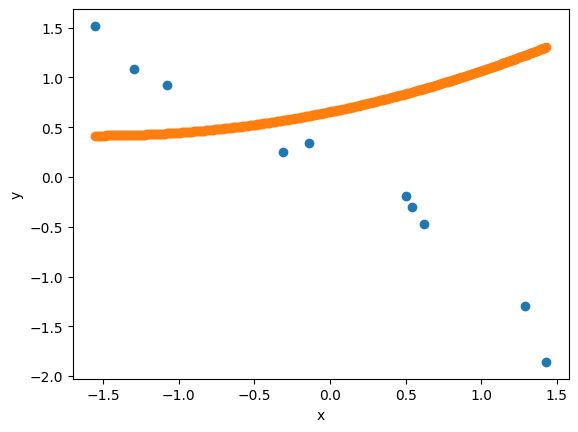

Iterations number:  10 ; Loss:  0.15520460410759365 ; Alpha:  0.1 ; Parameter values:  [ 0.29991262 -0.53910677 -0.18306807]


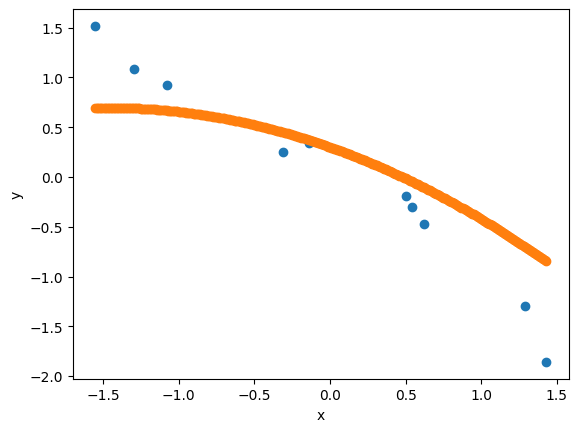

Iterations number:  20 ; Loss:  0.02936158052806284 ; Alpha:  0.1 ; Parameter values:  [ 0.2305359  -0.84417999 -0.19583487]


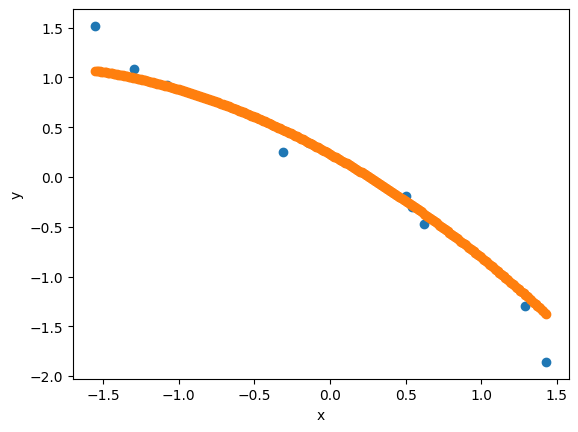

Iterations number:  30 ; Loss:  0.014161415858830555 ; Alpha:  0.1 ; Parameter values:  [ 0.20707047 -0.95066956 -0.19311699]


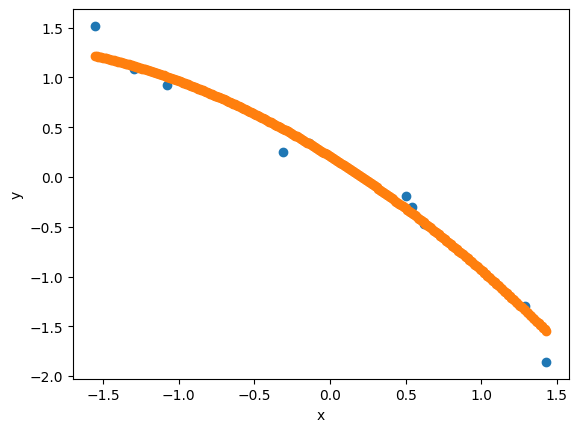

Iterations number:  40 ; Loss:  0.012293728559155614 ; Alpha:  0.1 ; Parameter values:  [ 0.19697289 -0.98749061 -0.19032747]


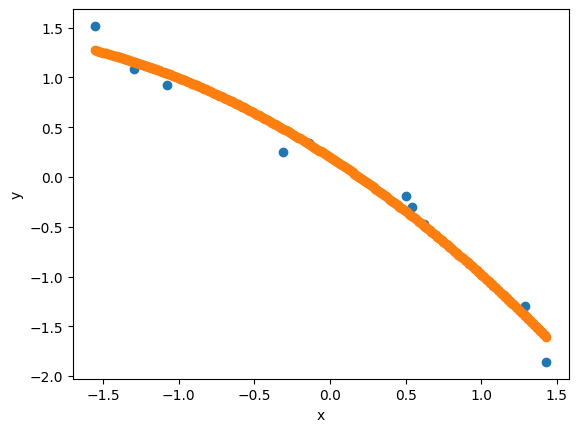

Iterations number:  50 ; Loss:  0.012055324789019493 ; Alpha:  0.1 ; Parameter values:  [ 0.19186635 -1.00007308 -0.18819191]


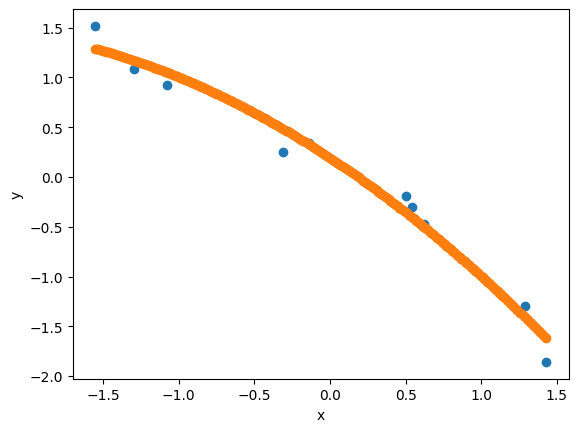

Iterations number:  60 ; Loss:  0.012019979980067241 ; Alpha:  0.1 ; Parameter values:  [ 0.18888886 -1.00426689 -0.18658959]


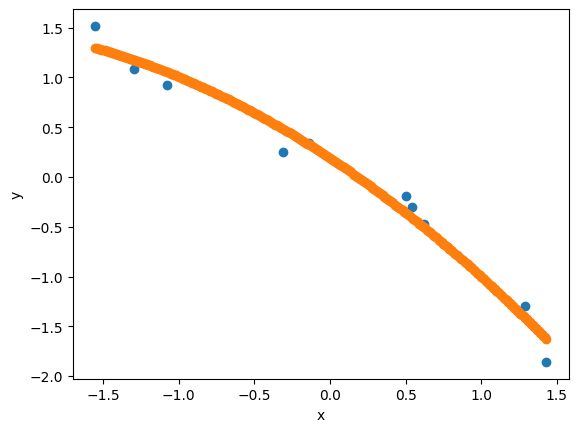

Iterations number:  70 ; Loss:  0.012012114884602442 ; Alpha:  0.1 ; Parameter values:  [ 0.18695362 -1.00558423 -0.18538932]


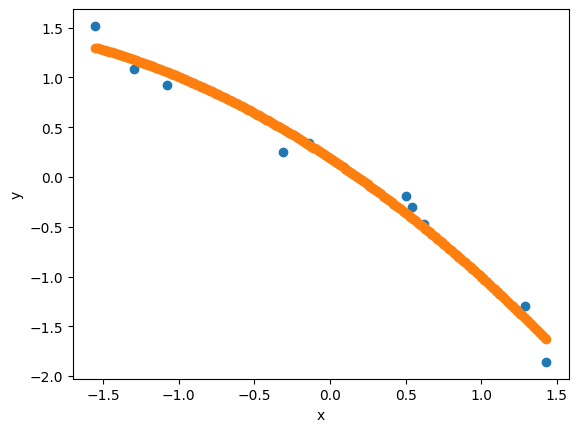

Iterations number:  80 ; Loss:  0.012009157163421918 ; Alpha:  0.1 ; Parameter values:  [ 0.18560695 -1.00593498 -0.18449034]


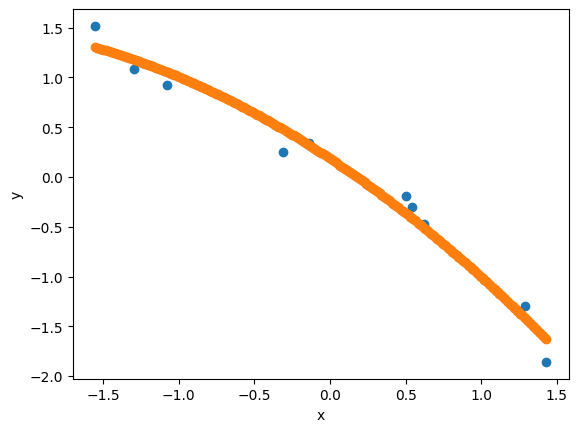

Iterations number:  90 ; Loss:  0.012007674802230818 ; Alpha:  0.1 ; Parameter values:  [ 0.18463415 -1.00597596 -0.18381702]


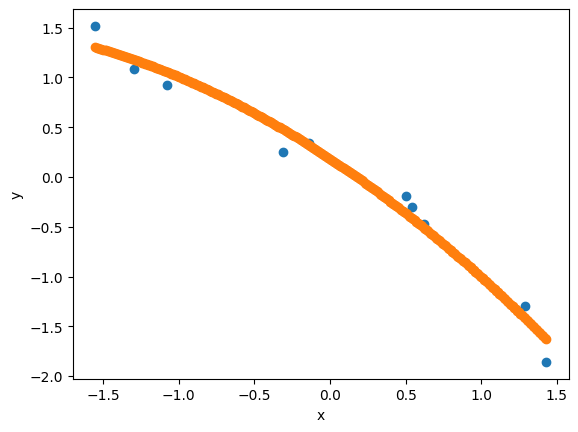

Input Data
[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
Output Data
[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]
Input Data normalized
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
Output Data normalized
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
Iterations number:  0 ; Loss:  1.4853395403223237 ; Alpha:  0.01 ; Parameter values:  [0.7405     0.43606072 0.19010371]


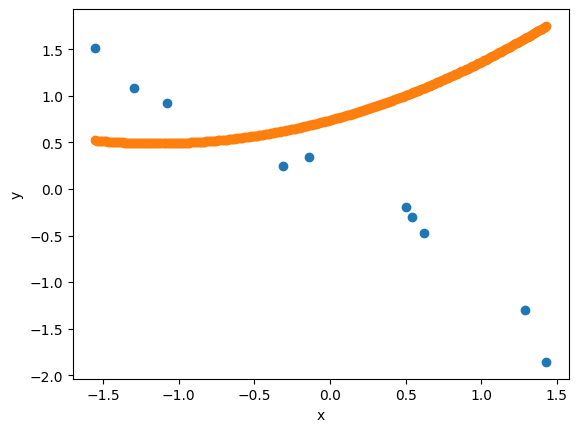

Iterations number:  10 ; Loss:  1.1536797192368298 ; Alpha:  0.01 ; Parameter values:  [0.65548032 0.30331583 0.10355817]


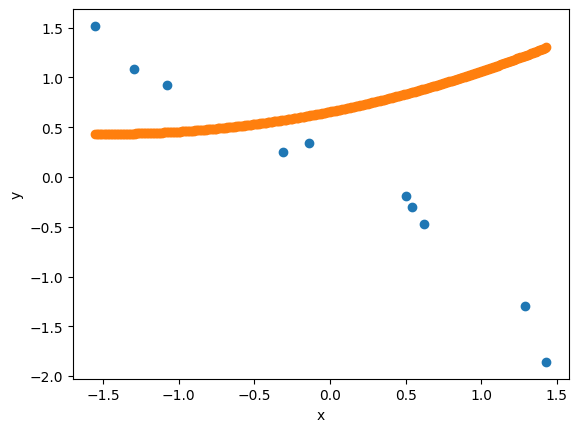

Iterations number:  20 ; Loss:  0.9070940483526677 ; Alpha:  0.01 ; Parameter values:  [0.58599303 0.18206746 0.03606955]


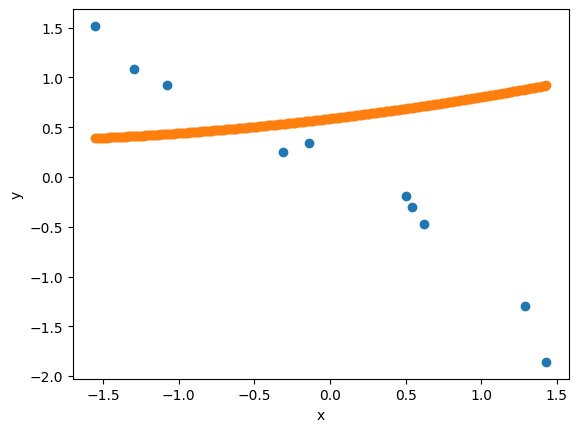

Iterations number:  30 ; Loss:  0.7204839466169648 ; Alpha:  0.01 ; Parameter values:  [ 0.52892155  0.07147996 -0.01652982]


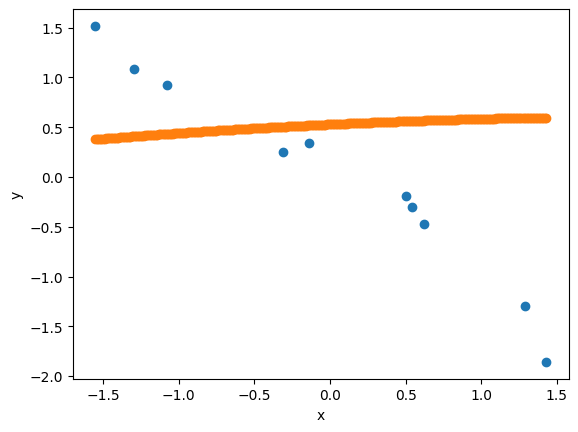

Iterations number:  40 ; Loss:  0.5770604450686015 ; Alpha:  0.01 ; Parameter values:  [ 0.4818041  -0.02926008 -0.05749693]


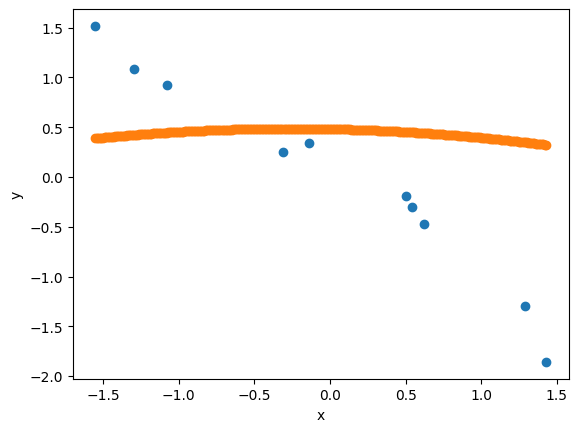

Iterations number:  50 ; Loss:  0.46537564211790966 ; Alpha:  0.01 ; Parameter values:  [ 0.44269316 -0.12093334 -0.0893771 ]


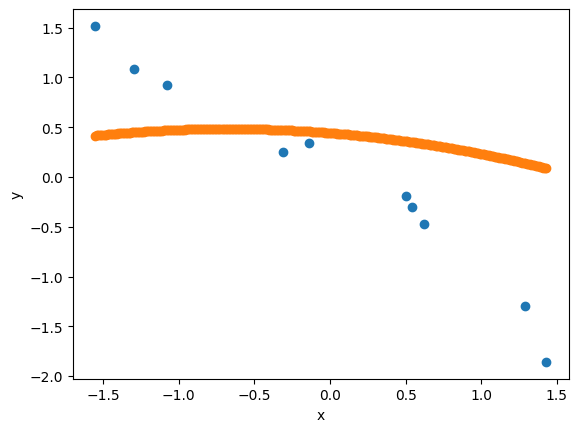

Iterations number:  60 ; Loss:  0.37746118807377416 ; Alpha:  0.01 ; Parameter values:  [ 0.41004532 -0.20428108 -0.11415944]


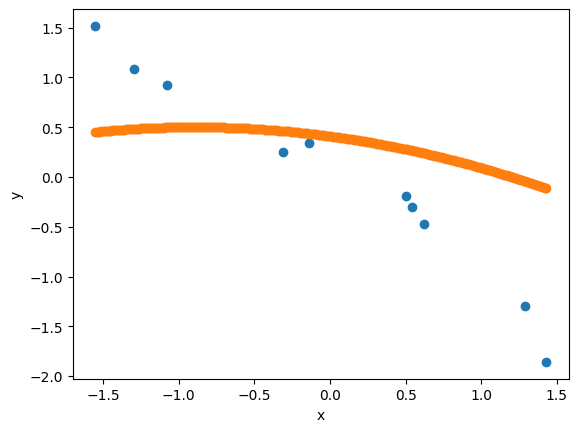

Iterations number:  70 ; Loss:  0.30765173269446366 ; Alpha:  0.01 ; Parameter values:  [ 0.38263506 -0.28000119 -0.13339839]


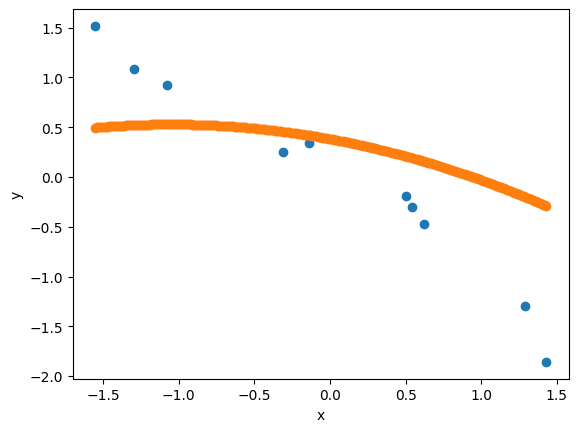

Iterations number:  80 ; Loss:  0.2518339413568623 ; Alpha:  0.01 ; Parameter values:  [ 0.35948715 -0.34874634 -0.14830867]


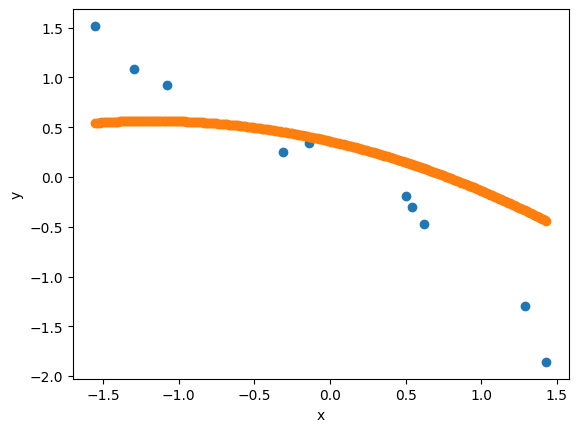

Iterations number:  90 ; Loss:  0.20696133445100803 ; Alpha:  0.01 ; Parameter values:  [ 0.33982356 -0.4111236  -0.15983951]


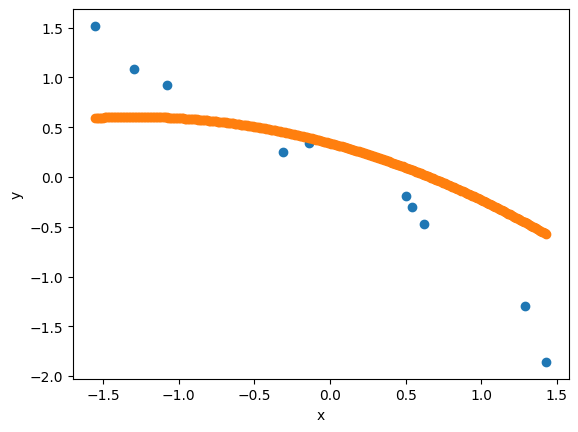

Input Data
[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
Output Data
[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]
Input Data normalized
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
Output Data normalized
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
Iterations number:  0 ; Loss:  1.4853395403223237 ; Alpha:  0.001 ; Parameter values:  [0.74905    0.44860607 0.19901037]


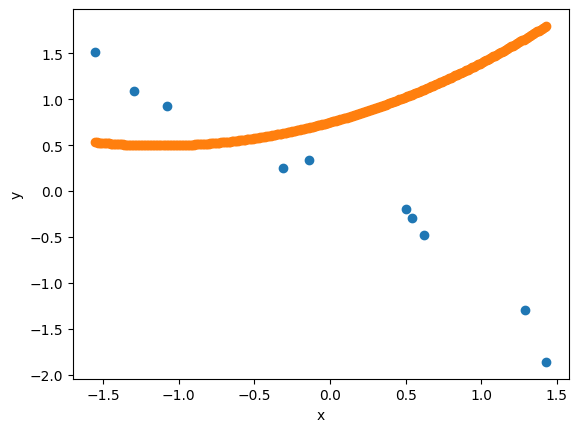

Iterations number:  10 ; Loss:  1.4476508353099906 ; Alpha:  0.001 ; Parameter values:  [0.73965596 0.43473453 0.18924658]


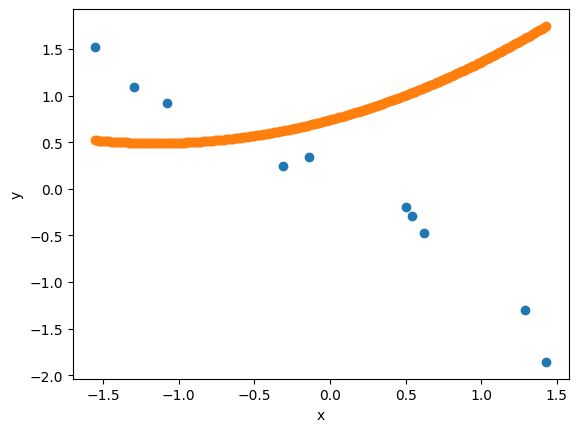

Iterations number:  20 ; Loss:  1.4111135016789045 ; Alpha:  0.001 ; Parameter values:  [0.73045158 0.42098554 0.17971963]


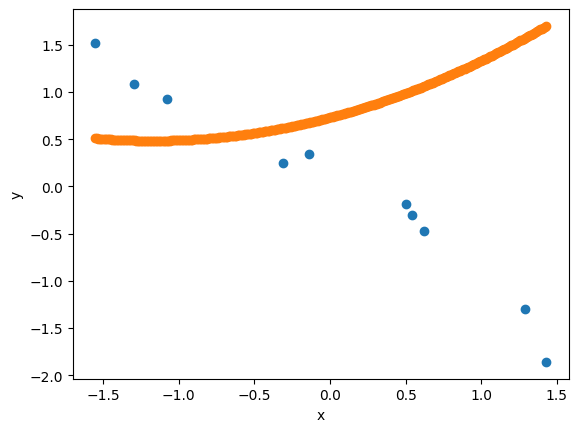

Iterations number:  30 ; Loss:  1.3756854684393995 ; Alpha:  0.001 ; Parameter values:  [0.72143262 0.40735827 0.1704238 ]


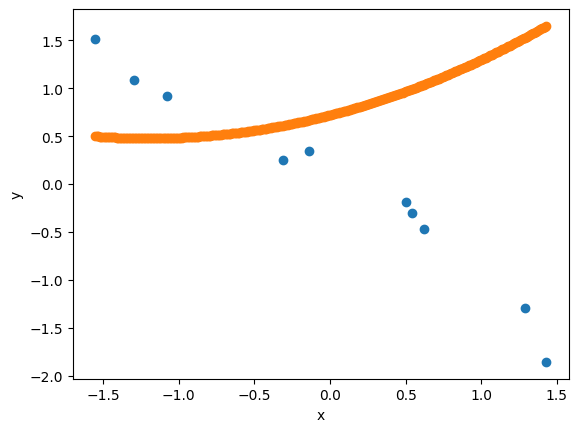

Iterations number:  40 ; Loss:  1.3413264146897805 ; Alpha:  0.001 ; Parameter values:  [0.71259497 0.39385187 0.16135354]


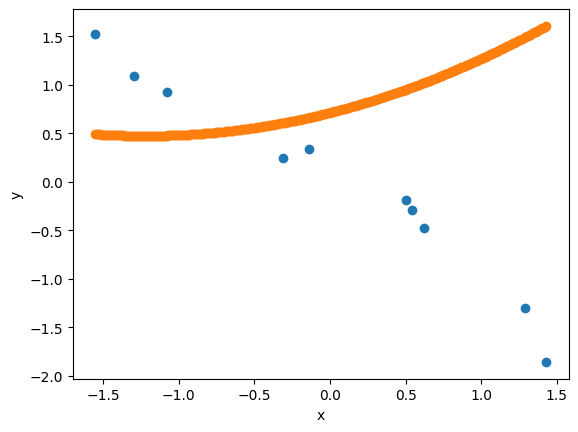

Iterations number:  50 ; Loss:  1.3079976913245546 ; Alpha:  0.001 ; Parameter values:  [0.70393461 0.38046549 0.1525034 ]


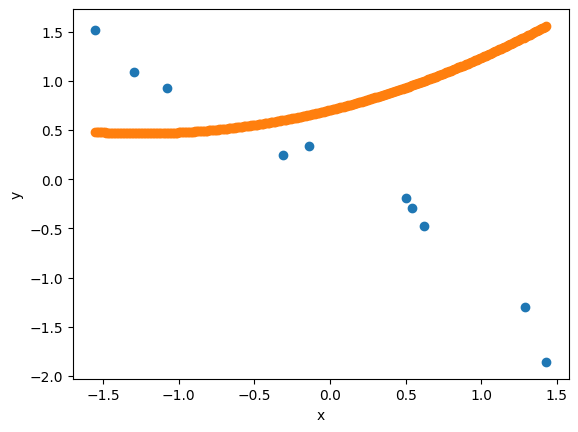

Iterations number:  60 ; Loss:  1.275662246369553 ; Alpha:  0.001 ; Parameter values:  [0.6954476  0.3671983  0.14386807]


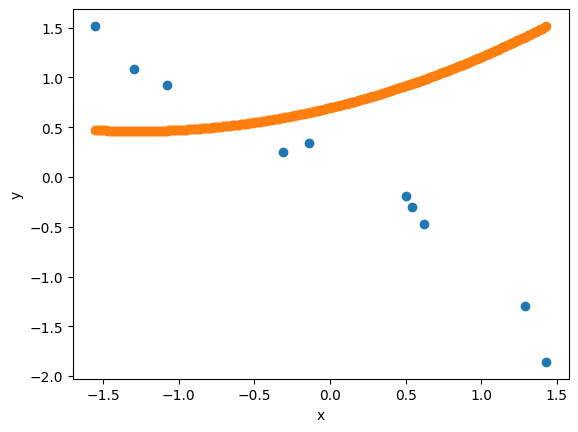

Iterations number:  70 ; Loss:  1.2442845537733167 ; Alpha:  0.001 ; Parameter values:  [0.68713009 0.35404945 0.13544239]


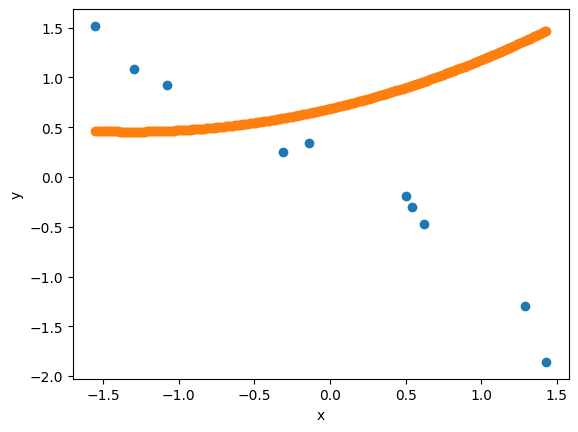

Iterations number:  80 ; Loss:  1.2138305454921736 ; Alpha:  0.001 ; Parameter values:  [0.67897835 0.34101809 0.12722128]


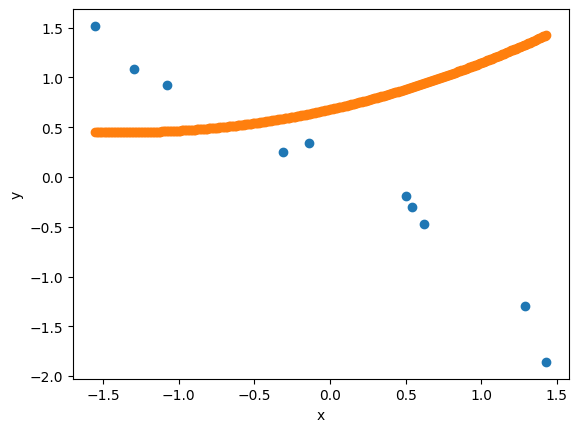

Iterations number:  90 ; Loss:  1.1842675467141548 ; Alpha:  0.001 ; Parameter values:  [0.6709887  0.32810338 0.11919983]


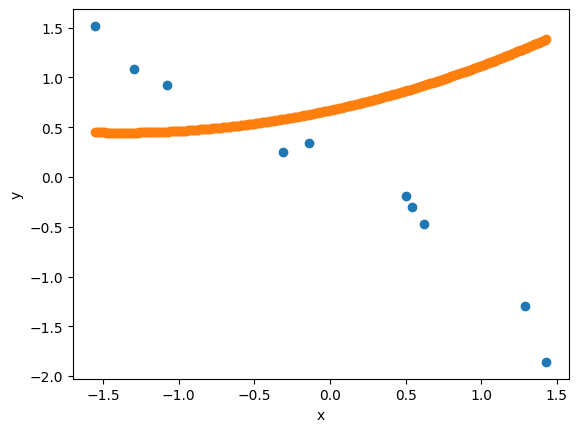

Input Data
[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
Output Data
[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]
Input Data normalized
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
Output Data normalized
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
Iterations number:  0 ; Loss:  1.4853395403223237 ; Alpha:  0.0001 ; Parameter values:  [0.749905   0.44986061 0.19990104]


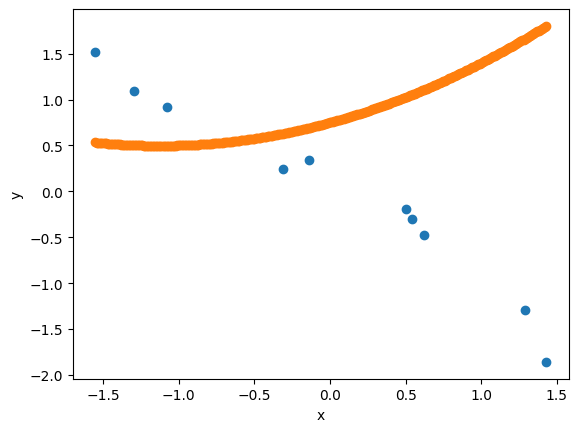

Iterations number:  10 ; Loss:  1.481520299219442 ; Alpha:  0.0001 ; Parameter values:  [0.74895607 0.44846736 0.19891274]


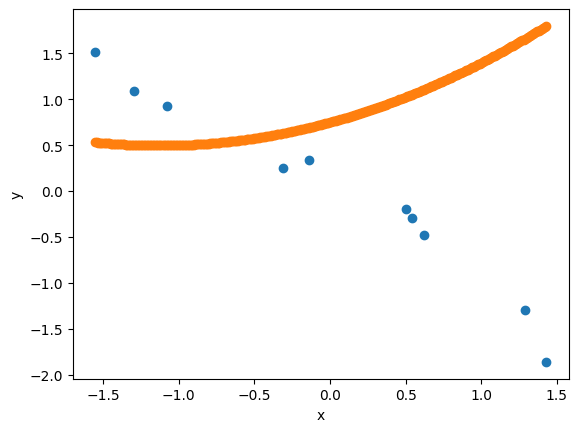

Iterations number:  20 ; Loss:  1.4777129445072228 ; Alpha:  0.0001 ; Parameter values:  [0.74800907 0.44707534 0.19792687]


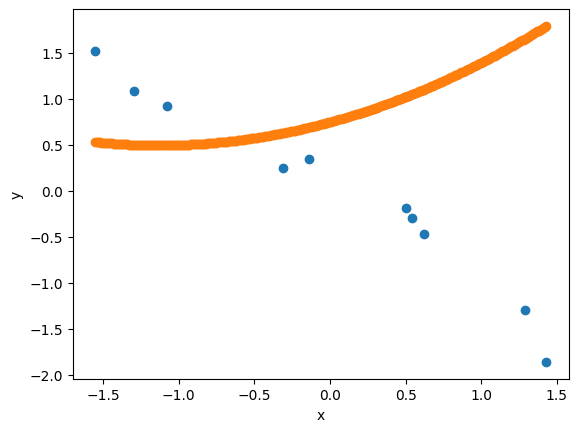

Iterations number:  30 ; Loss:  1.4739174317599677 ; Alpha:  0.0001 ; Parameter values:  [0.747064   0.44568456 0.19694341]


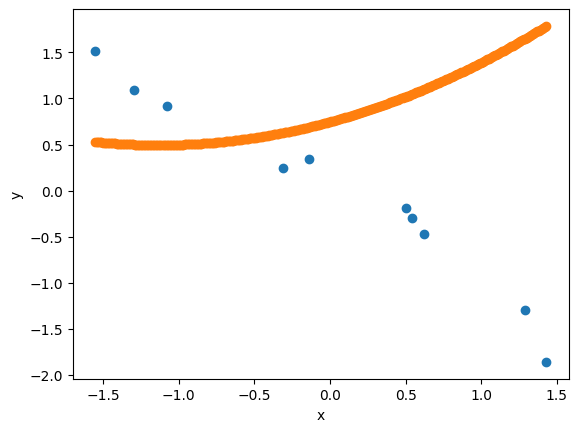

Iterations number:  40 ; Loss:  1.4701337167412025 ; Alpha:  0.0001 ; Parameter values:  [0.74612086 0.44429501 0.19596236]


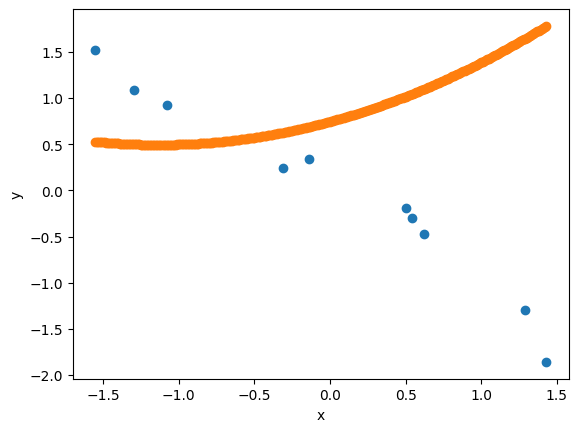

Iterations number:  50 ; Loss:  1.466361755402807 ; Alpha:  0.0001 ; Parameter values:  [0.74517964 0.44290668 0.19498371]


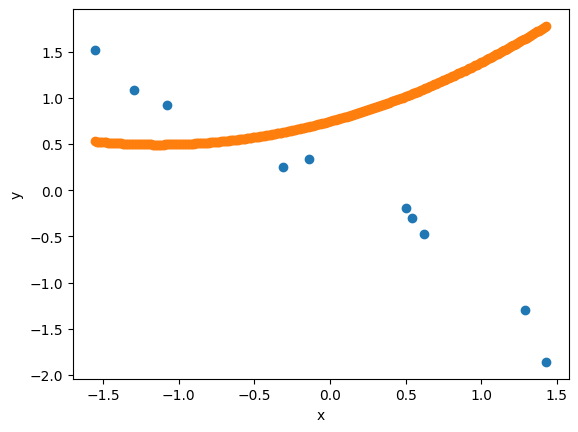

Iterations number:  60 ; Loss:  1.4626015038841573 ; Alpha:  0.0001 ; Parameter values:  [0.74424034 0.44151959 0.19400746]


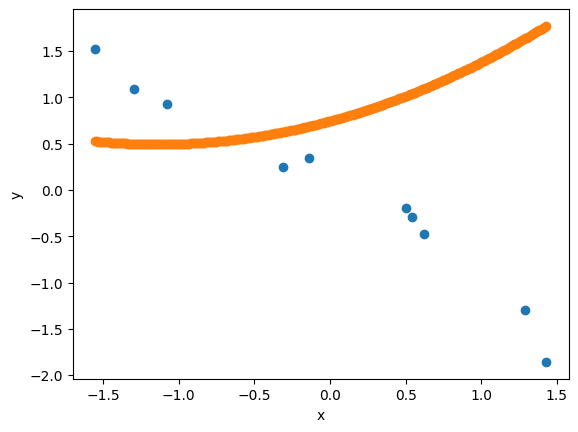

Iterations number:  70 ; Loss:  1.4588529185112649 ; Alpha:  0.0001 ; Parameter values:  [0.74330295 0.44013373 0.1930336 ]


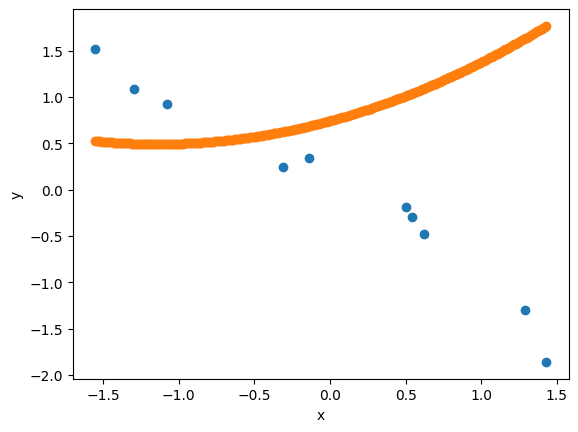

Iterations number:  80 ; Loss:  1.4551159557959237 ; Alpha:  0.0001 ; Parameter values:  [0.74236747 0.4387491  0.19206213]


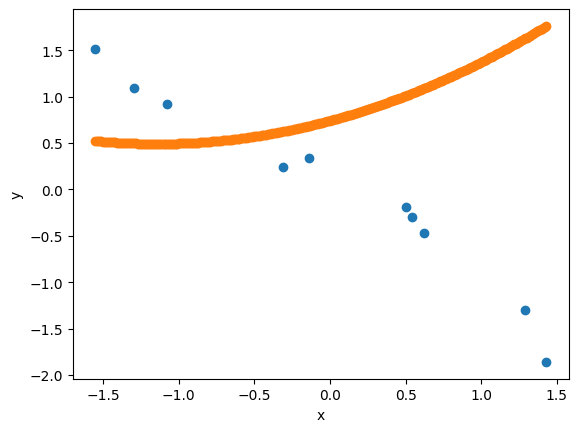

Iterations number:  90 ; Loss:  1.4513905724348615 ; Alpha:  0.0001 ; Parameter values:  [0.7414339  0.43736569 0.19109303]


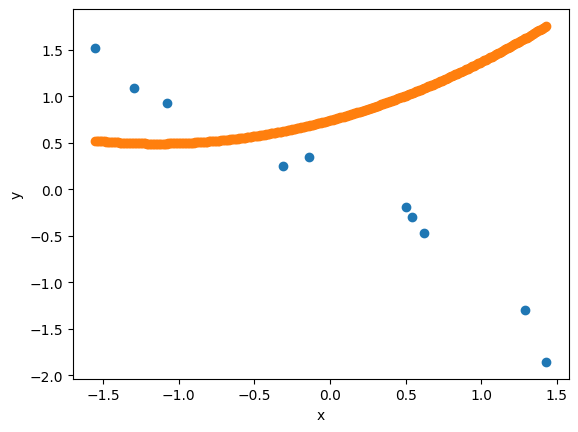

Input Data
[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
Output Data
[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]
Input Data normalized
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
Output Data normalized
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
Iterations number:  0 ; Loss:  1.4853395403223237 ; Alpha:  1e-05 ; Parameter values:  [0.7499905  0.44998606 0.1999901 ]


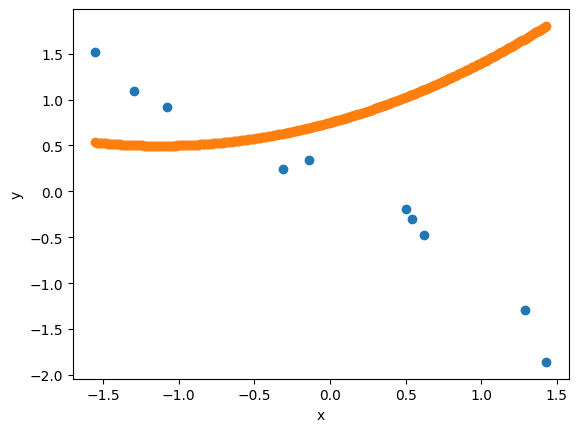

Iterations number:  10 ; Loss:  1.4849571068877303 ; Alpha:  1e-05 ; Parameter values:  [0.74989551 0.44984667 0.19989115]


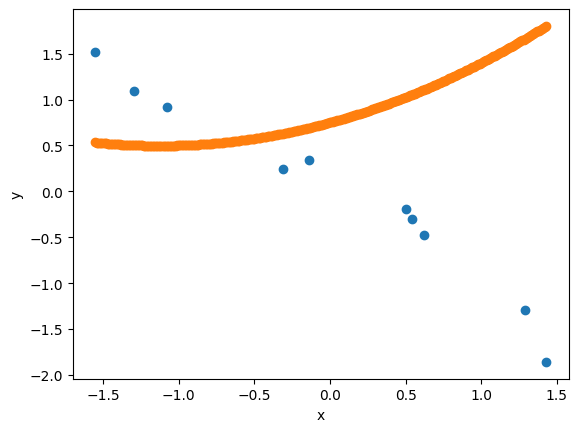

Iterations number:  20 ; Loss:  1.4845747926982371 ; Alpha:  1e-05 ; Parameter values:  [0.74980054 0.4497073  0.19979223]


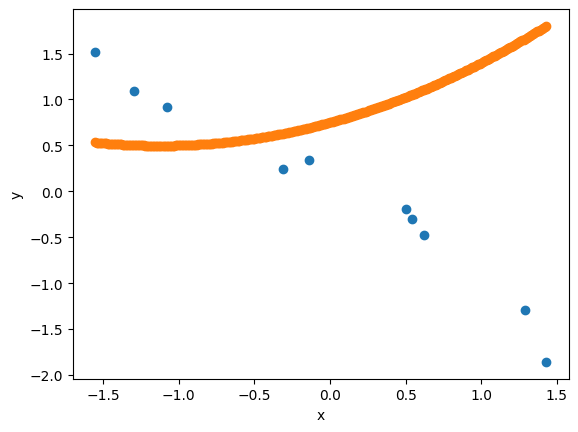

Iterations number:  30 ; Loss:  1.484192597709175 ; Alpha:  1e-05 ; Parameter values:  [0.74970559 0.44956794 0.19969333]


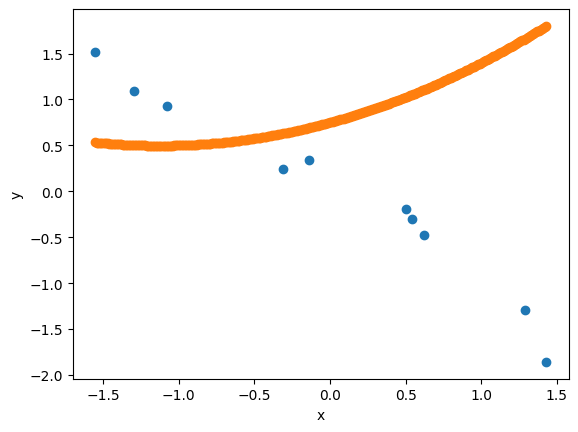

Iterations number:  40 ; Loss:  1.4838105218758932 ; Alpha:  1e-05 ; Parameter values:  [0.74961066 0.44942859 0.19959445]


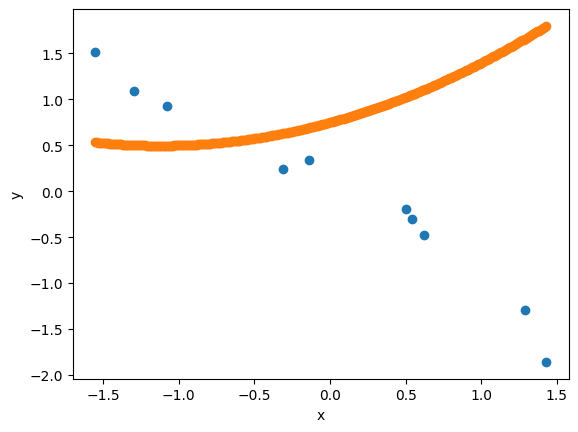

Iterations number:  50 ; Loss:  1.4834285651537606 ; Alpha:  1e-05 ; Parameter values:  [0.74951575 0.44928925 0.1994956 ]


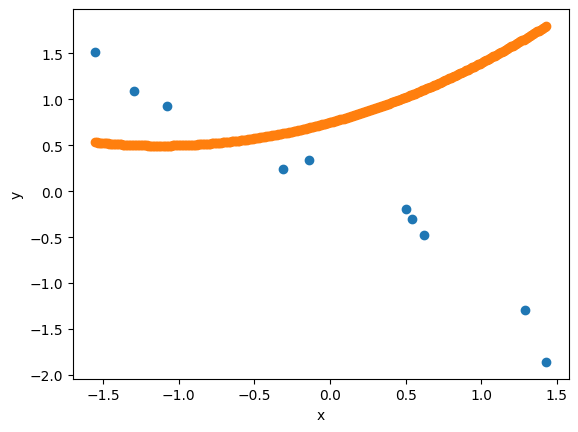

Iterations number:  60 ; Loss:  1.4830467274981647 ; Alpha:  1e-05 ; Parameter values:  [0.74942085 0.44914993 0.19939677]


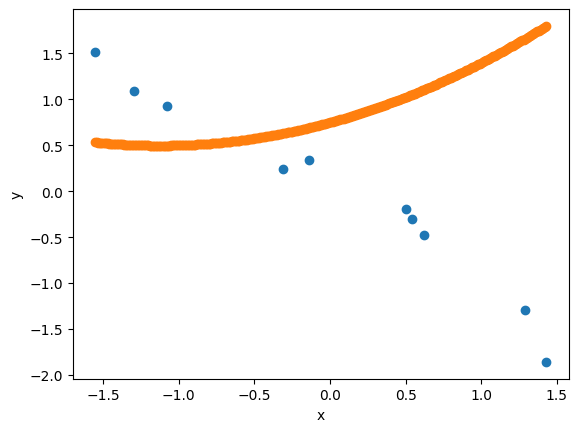

Iterations number:  70 ; Loss:  1.4826650088645126 ; Alpha:  1e-05 ; Parameter values:  [0.74932598 0.44901062 0.19929797]


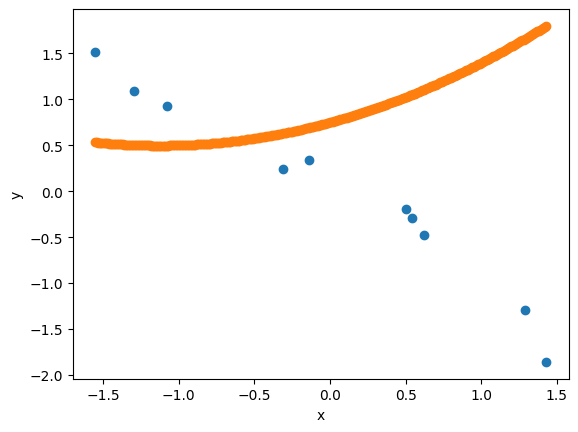

Iterations number:  80 ; Loss:  1.482283409208229 ; Alpha:  1e-05 ; Parameter values:  [0.74923113 0.44887132 0.19919919]


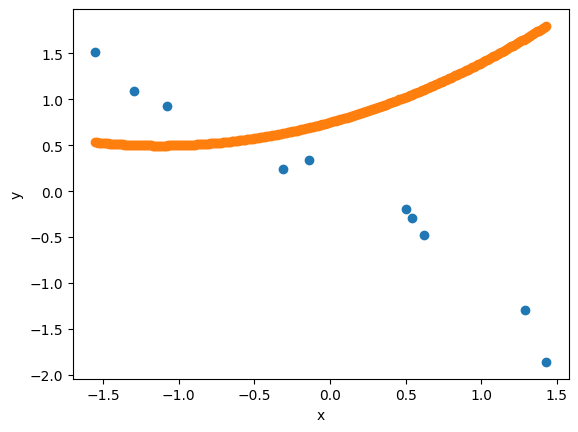

Iterations number:  90 ; Loss:  1.4819019284847597 ; Alpha:  1e-05 ; Parameter values:  [0.74913629 0.44873203 0.19910043]


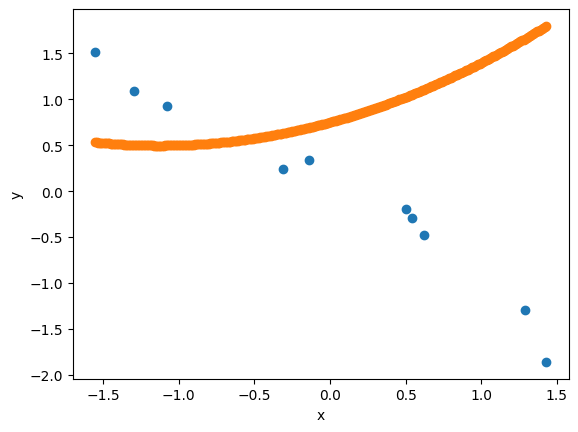

In [8]:
alphas=[1,0.1,0.01,0.001,0.0001,0.00001]

for alpha in alphas:
    normalization=True 
    initial_theta=np.asarray([0.75,0.45,0.2])
    max_iterations=100
    polynomial_regression(x,y,normalization,alpha,initial_theta,max_iterations)